## Packages

In [416]:
import requests
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import factor_analyzer as FA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import re
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import boxcox, levene, norm, mode
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from IPython.display import display
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

### Data Scraping

In [417]:
#endpoint = "https://data.cdc.gov/resource/48va-t53r.json?$limit=4000"

#r = requests.get(endpoint)
#original_data = pd.DataFrame(r.json())
#original_data

### Data Cleaning

In [418]:
data = original_data

data['rpl_themes'] = pd.to_numeric(data['rpl_themes'])

#Remove last column
data = data.iloc[: , :-1]

#Sorting in alphabetical order by state then by column
data= data.sort_values(["state", "county"])
data = data.reset_index(drop=True)

data = data[data.rpl_themes >= 0]

#We remove Margin Of Error Columns
data = data.loc[:, ~data.columns.str.startswith("m_")]
data = data.loc[:, ~data.columns.str.startswith("mp_")]

#We would like a dataset with only the EPL columns 
data = data.loc[:, ~data.columns.str.startswith("e_")]
data = data.loc[:, ~data.columns.str.startswith("ep_")]

data = data.drop(["st_abbr", "fips", "location", "st"], axis=1)
full_data = data
full_data

,state,county,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,spl_theme1,rpl_theme1,epl_age65,epl_age17,epl_disabl,epl_sngpnt,spl_theme2,rpl_theme2,epl_minrty,epl_limeng,spl_theme3,rpl_theme3,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,spl_theme4,rpl_theme4,spl_themes,rpl_themes,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4,f_total
0,ALABAMA,Autauga,594.4434589,0.5401,0.2745,0.286,0.4397,1.5403,0.3631,0.185,0.7529,0.7905,0.3792,2.1076,0.581,0.6336,0.5113,1.1449,0.5947,0.6017,0.7408,0.2964,0.4846,0.1525,2.276,0.3741,7.0688,0.4354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ALABAMA,Baldwin,1589.7930067,0.2239,0.3121,0.2057,0.3209,1.0626,0.2232,0.6428,0.4323,0.3524,0.1391,1.5666,0.199,0.5158,0.3582,0.874,0.4358,0.9713,0.5339,0.2604,0.1328,0.3018,2.2002,0.3359,5.7034,0.2162,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,ALABAMA,Barbour,885.0016356,0.9631,0.9217,0.9481,0.9701,3.803,0.978,0.4893,0.3327,0.9064,0.9468,2.6752,0.9153,0.8965,0.7052,1.6017,0.8558,0.2416,0.928,0.8198,0.8685,0.9449,3.8028,0.9889,11.8827,0.9959,1,1,1,1,4,0,0,1,1,2,0,0,0,0,1,0,0,1,2,8
3,ALABAMA,Bibb,622.4610887,0.443,0.7895,0.8987,0.7351,2.8663,0.7694,0.32,0.2846,0.6074,0.1706,1.3826,0.1203,0.639,0.227,0.866,0.4323,0.4317,0.9207,0.0981,0.5441,0.9214,2.916,0.7189,8.0309,0.6003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2
4,ALABAMA,Blount,644.8304602,0.4723,0.2611,0.7561,0.8405,2.33,0.6143,0.4715,0.6406,0.3763,0.2961,1.7845,0.3187,0.4206,0.717,1.1376,0.5915,0.1512,0.8816,0.3703,0.242,0.1165,1.7616,0.1741,7.0137,0.4242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,WYOMING,Sweetwater,10426.9757251,0.3127,0.449,0.1497,0.2668,1.1782,0.2576,0.0293,0.915,0.2041,0.7679,1.9163,0.4193,0.568,0.7052,1.2732,0.6718,0.7307,0.8306,0.4817,0.0503,0.2582,2.3515,0.412,6.7192,0.3701,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3138,WYOMING,Teton,3996.8446222,0.0522,0.0264,0.0051,0.0548,0.1385,0.0025,0.1334,0.1506,0.006,0.2216,0.5116,0.0096,0.54,0.9,1.44,0.7736,0.8109,0.1442,0.9688,0.0503,0.7561,2.7303,0.6266,4.8204,0.1127,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,2
3139,WYOMING,Uinta,2081.7198073,0.343,0.6032,0.4443,0.1347,1.5252,0.3583,0.0675,0.9685,0.6488,0.2665,1.9513,0.4486,0.4136,0.4642,0.8778,0.439,0.7453,0.8816,0.7249,0.1971,0.2582,2.8071,0.6657,7.1614,0.4522,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3140,WYOMING,Washakie,2238.6729723,0.336,0.6207,0.4035,0.3792,1.7394,0.4293,0.738,0.7122,0.4448,0.2961,2.1911,0.6482,0.533,0.227,0.76,0.3687,0.1958,0.5384,0.4457,0.3715,0.4995,2.0509,0.2751,6.7414,0.3732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## EDA

In [419]:
# Does the dataframe contain any NA values?
display(data.isnull().values.any())

False

In [420]:
# This is the SVI column
display(data["rpl_themes"].any() < 0)

False

## PCA

In [421]:
pd.set_option("display.max_columns", None)  # View all columns

In [422]:
# Warnings about using iloc
warnings.filterwarnings("ignore")

# Standardize the data
X_numerical = data.iloc[:, 2:28]
list_numerical = X_numerical.columns

# Standardize the features
scalar = StandardScaler()

data[list_numerical] = pd.DataFrame(
    scalar.fit_transform(data[list_numerical])
)  # scaling the data
data

,state,county,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,spl_theme1,rpl_theme1,epl_age65,epl_age17,epl_disabl,epl_sngpnt,spl_theme2,rpl_theme2,epl_minrty,epl_limeng,spl_theme3,rpl_theme3,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,spl_theme4,rpl_theme4,spl_themes,rpl_themes,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4,f_total
0,ALABAMA,Autauga,-0.146226,0.147034,-0.758697,-0.741168,-0.199502,-0.454253,-0.474026,-1.078248,0.892276,1.016059,-0.397494,0.238825,0.281095,0.466278,0.104862,0.317957,0.328897,0.367873,0.838905,-0.655436,-0.033367,-1.149022,-0.271379,-0.435777,-0.172772,-0.223685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ALABAMA,Baldwin,0.129237,-0.946418,-0.628783,-1.019243,-0.609932,-0.937716,-0.958499,0.505686,-0.218058,-0.498723,-1.227960,-0.795355,-1.041932,0.059334,-0.401806,-0.198866,-0.221266,1.633605,0.123762,-0.778635,-1.247522,-0.640892,-0.380406,-0.568043,-0.854732,-0.982772,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,ALABAMA,Barbour,-0.065814,1.609811,1.477477,1.551660,1.632922,1.835741,1.655372,-0.025406,-0.563003,1.416797,1.565740,1.323854,1.438917,1.374474,0.746553,1.189440,1.232910,-0.865325,1.485956,1.135743,1.291572,1.547842,1.924679,1.692948,2.231571,1.717321,1,1,1,1,4,0,0,1,1,2,0,0,0,0,1,0,0,1,2,8
3,ALABAMA,Bibb,-0.138472,-0.188748,1.020706,1.380590,0.821045,0.887742,0.932991,-0.611164,-0.729588,0.382969,-1.119007,-1.147091,-1.314503,0.484932,-0.835999,-0.214128,-0.233384,-0.214309,1.460724,-1.334058,0.171983,1.467862,0.649159,0.758082,0.307757,0.347362,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2
4,ALABAMA,Blount,-0.132282,-0.087425,-0.804996,0.886771,1.185181,0.344973,0.395880,-0.086991,0.503348,-0.416086,-0.684924,-0.378816,-0.627360,-0.269538,0.785604,0.304030,0.317818,-1.174909,1.325576,-0.402536,-0.870644,-1.271545,-1.011262,-1.128271,-0.200292,-0.262471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,WYOMING,Sweetwater,0.795391,-1.540174,-1.615920,-1.713914,-1.529254,-1.872963,-1.722783,-1.256777,-1.193670,-1.696442,-0.942607,-2.812102,-1.697904,0.142933,1.391223,0.880949,0.948307,1.084299,-1.223224,1.645650,-1.532251,0.905278,0.382059,0.438496,-1.295754,-1.341192,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3138,WYOMING,Teton,0.265379,-0.534558,0.377011,-0.192981,-1.253215,-0.469535,-0.490648,-1.484784,1.638964,0.526115,-0.787305,-0.059959,-0.177462,-0.293720,-0.051011,-0.191616,-0.210187,0.859645,1.325576,0.810976,-1.025606,-0.789281,0.492523,0.573879,-0.126522,-0.165507,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,2
3139,WYOMING,Uinta,0.308815,-0.558765,0.437476,-0.334269,-0.408517,-0.252752,-0.244775,0.835067,0.751320,-0.179239,-0.684924,0.398445,0.513837,0.118752,-0.835999,-0.416355,-0.453588,-1.022172,0.139316,-0.144502,-0.423705,0.031962,-0.595150,-0.778561,-0.336295,-0.439083,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3140,WYOMING,Washakie,0.352910,0.611803,-1.077607,-0.703768,-1.086003,-0.660410,-0.684922,0.294288,-0.531140,-0.340018,-0.684924,-0.697098,-0.948419,-0.653336,0.230288,-0.228055,-0.249657,-0.125954,1.228449,0.400312,-1.488420,1.099272,0.470804,0.547564,-0.404271,-0.528082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [423]:
data = data.iloc[:, 2:48]
data = data.drop(["rpl_themes"], axis=1)
data = data.dropna()

In [424]:
# Visualizing # of Components Needed to Explain Variance
pca = PCA().fit(data)
fig = px.line(
    np.cumsum(pca.explained_variance_ratio_),
    labels={
        "index": "Number of Components",
        "value": "Cumulative Explained Variance",
        "variable": "Variance Explained",
    },
    title="Cumulative Explained Variance vs Number of Components",
)
fig.show()

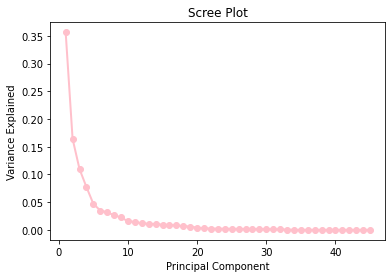

In [425]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, "o-", linewidth=2, color="pink")
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

In [426]:
# #Applying PCA
# #Taking no. of Principal Components as 5
pca = PCA(n_components=5)
pca.fit(data)
data_pca = pca.transform(data)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

,0,1,2,3,4
0,-1.174418,-0.086143,-1.337227,-1.312659,0.009567
1,-3.083400,0.988347,0.839759,0.289656,-0.477916
2,9.725390,0.440584,3.530331,1.018885,-0.006805
3,1.323859,-0.636849,0.503142,2.477249,-1.776459
4,-1.042269,-0.878186,-0.672997,-2.215089,-2.014660


In [427]:
# Component relations with features
components = pd.DataFrame(
    pca.components_, columns=data.columns, index=["PC1", "PC2", "PC3", "PC4", "PC5"],
)
components = abs(components)
components["Max"] = components.idxmax(axis=1)
components.T

,PC1,PC2,PC3,PC4,PC5
area_sqmi,0.027476,0.056214,0.030504,0.003041,0.074775
epl_pov,0.239045,0.13616,0.090077,0.085716,0.000895
epl_unemp,0.20453,0.076682,0.077998,0.06186,0.00387
epl_pci,0.218926,0.200269,0.047415,0.015451,0.058447
epl_nohsdp,0.234877,0.090264,0.049464,0.113761,0.176516
spl_theme1,0.262658,0.147282,0.077556,0.005364,0.070186
rpl_theme1,0.26083,0.149057,0.085205,0.002645,0.076265
epl_age65,0.068071,0.27397,0.12018,0.039395,0.229503
epl_age17,0.053358,0.119528,0.096991,0.411248,0.368574
epl_disabl,0.133067,0.319434,0.013294,0.025148,0.114829


In [428]:
final_df = full_data[
    ["state", "county", "epl_disabl", "epl_groupq", "epl_sngpnt", "f_total",]
]
final_df = final_df.dropna()
final_df

,state,county,epl_disabl,epl_groupq,epl_sngpnt,f_total
0,ALABAMA,Autauga,1.016059,-1.149022,-0.397494,0
1,ALABAMA,Baldwin,-0.498723,-0.640892,-1.227960,1
2,ALABAMA,Barbour,1.416797,1.547842,1.565740,8
3,ALABAMA,Bibb,0.382969,1.467862,-1.119007,2
4,ALABAMA,Blount,-0.416086,-1.271545,-0.684924,0
...,...,...,...,...,...,...
3136,WYOMING,Sublette,-1.011488,-0.789281,0.946954,0
3137,WYOMING,Sweetwater,-1.696442,0.905278,-0.942607,1
3138,WYOMING,Teton,0.526115,-0.789281,-0.787305,2
3139,WYOMING,Uinta,-0.179239,0.031962,-0.684924,1


In [429]:
# Fix me!

#correlation = round(final_df.iloc[:, 2:10].corr(), 2)

#fig = px.imshow(correlation, text_auto=True)
#fig.show()

## Factor Analysis

In [430]:
data = full_data.drop(
    [
        "rpl_themes",
        "rpl_theme1",
        "rpl_theme2",
        "rpl_theme3",
        "rpl_theme4",
        "spl_theme1",
        "spl_theme2",
        "spl_theme3",
        "spl_theme4",
        "spl_themes",
        "f_total",
    ],
    axis=1,
)
data

,state,county,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4
0,ALABAMA,Autauga,-0.146226,0.147034,-0.758697,-0.741168,-0.199502,-1.078248,0.892276,1.016059,-0.397494,0.466278,0.104862,0.367873,0.838905,-0.655436,-0.033367,-1.149022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ALABAMA,Baldwin,0.129237,-0.946418,-0.628783,-1.019243,-0.609932,0.505686,-0.218058,-0.498723,-1.227960,0.059334,-0.401806,1.633605,0.123762,-0.778635,-1.247522,-0.640892,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,ALABAMA,Barbour,-0.065814,1.609811,1.477477,1.551660,1.632922,-0.025406,-0.563003,1.416797,1.565740,1.374474,0.746553,-0.865325,1.485956,1.135743,1.291572,1.547842,1,1,1,1,4,0,0,1,1,2,0,0,0,0,1,0,0,1,2
3,ALABAMA,Bibb,-0.138472,-0.188748,1.020706,1.380590,0.821045,-0.611164,-0.729588,0.382969,-1.119007,0.484932,-0.835999,-0.214309,1.460724,-1.334058,0.171983,1.467862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
4,ALABAMA,Blount,-0.132282,-0.087425,-0.804996,0.886771,1.185181,-0.086991,0.503348,-0.416086,-0.684924,-0.269538,0.785604,-1.174909,1.325576,-0.402536,-0.870644,-1.271545,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,WYOMING,Sweetwater,0.795391,-1.540174,-1.615920,-1.713914,-1.529254,-1.256777,-1.193670,-1.696442,-0.942607,0.142933,1.391223,1.084299,-1.223224,1.645650,-1.532251,0.905278,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3138,WYOMING,Teton,0.265379,-0.534558,0.377011,-0.192981,-1.253215,-1.484784,1.638964,0.526115,-0.787305,-0.293720,-0.051011,0.859645,1.325576,0.810976,-1.025606,-0.789281,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1
3139,WYOMING,Uinta,0.308815,-0.558765,0.437476,-0.334269,-0.408517,0.835067,0.751320,-0.179239,-0.684924,0.118752,-0.835999,-1.022172,0.139316,-0.144502,-0.423705,0.031962,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3140,WYOMING,Washakie,0.352910,0.611803,-1.077607,-0.703768,-1.086003,0.294288,-0.531140,-0.340018,-0.684924,-0.653336,0.230288,-0.125954,1.228449,0.400312,-1.488420,1.099272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [431]:
### Standardize Data
X_numerical = data.iloc[:, 2:18]
list_numerical = X_numerical.columns

# Standardize the features
scalar = StandardScaler()


data[list_numerical] = pd.DataFrame(
    scalar.fit_transform(data[list_numerical])
)  # scaling the data
data = data.iloc[:, :18].copy()
data = data.dropna()
display(data)

,state,county,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq
0,ALABAMA,Autauga,-0.146090,0.147536,-0.758367,-0.740835,-0.199158,-1.078762,0.892632,1.016109,-0.397201,0.466728,0.105365,0.367483,0.839183,-0.655098,-0.033457,-1.148721
1,ALABAMA,Baldwin,0.129336,-0.946127,-0.628433,-1.018957,-0.609602,0.505331,-0.217724,-0.498498,-1.227636,0.059744,-0.401407,1.633410,0.124055,-0.778307,-1.247435,-0.640554
2,ALABAMA,Barbour,-0.065688,1.610596,1.478155,1.552366,1.633330,-0.025814,-0.562676,1.416801,1.565959,1.375014,0.747188,-0.865906,1.486220,1.136223,1.291290,1.548342
3,ALABAMA,Bibb,-0.138337,-0.188310,1.021313,1.381268,0.821425,-0.611631,-0.729264,0.383093,-1.118687,0.485384,-0.835689,-0.214789,1.460988,-1.333774,0.171863,1.468356
4,ALABAMA,Blount,-0.132147,-0.086968,-0.804673,0.887369,1.185573,-0.087406,0.503696,-0.415871,-0.684619,-0.269159,0.786247,-1.175538,1.325843,-0.402178,-0.870612,-1.271253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,WYOMING,Sheridan,2.574696,-0.638988,-0.155349,-1.212914,-0.796513,-1.617519,1.454045,-1.011204,0.947197,0.240089,0.747188,0.809324,1.149567,-0.020915,-1.532123,-0.788954
3136,WYOMING,Sublette,0.795398,-1.539998,-1.615724,-1.713740,-1.528955,-1.257309,-1.193356,-1.696079,-0.942293,0.143352,1.391990,1.084019,-1.222901,1.646171,-1.532123,0.905730
3137,WYOMING,Sweetwater,0.265459,-0.534187,0.377518,-0.192559,-1.252907,-1.485338,1.639335,0.526222,-0.786997,-0.293344,-0.050539,0.859331,1.325843,0.811430,-1.025551,-0.788954
3138,WYOMING,Teton,0.308889,-0.558399,0.437992,-0.333871,-0.408180,0.834744,0.751673,-0.179051,-0.684619,0.119168,-0.835689,-1.022777,0.139609,-0.144123,-0.423738,0.032350


### Bartlett's Test of Sphericity

In [432]:
chi2, p = calculate_bartlett_sphericity(data.iloc[:, 2:])
print("Our chi squared statistic is ", chi2)
print("Our p-value from our chi statistic is ", p)

Our chi squared statistic is  27673.15010015283
Our p-value from our chi statistic is  0.0


In [433]:
# fa = FA.FactorAnalyzer(rotation = None,impute = "drop",n_factors=data.shape[1])
# fa.fit(data.iloc[:,2:])
# ev,_ = fa.get_eigenvalues()
# print(ev.shape)

# px.line(x = range(1,data.shape[1]-1), y = ev, labels = {'x': "Factors", "y": 'Eigenvalues'}, title = "Scree Plot for Factor Analysis", color_discrete_sequence = ['#e377c2'], markers = True)

In [434]:
FA_vars = data.iloc[:, 2:].columns

newFA = sm.multivariate.Factor(data.iloc[:, 2:])
model = newFA.fit()
# display(model.summary())
newev = model.eigenvals

In [435]:
px.line(
    x=range(1, data.shape[1] - 1),
    y=newev,
    labels={"x": "Factors", "y": "Eigenvalues"},
    title="Scree Plot for Factor Analysis",
    color_discrete_sequence=["#e377c2"],
    markers=True,
)

In [436]:
# https://www.ibm.com/docs/en/spss-statistics/beta?topic=analysis-exploratory-factor-rotation
newFA = sm.multivariate.Factor(data.iloc[:, 2:], n_factor=4, method="pa")
model = newFA.fit()
display(model.summary())
# newev = model.eigenvals

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                                      Factor analysis results
===================================================================================================================================================================
                                                    Eigenvalues                                                                                                    
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
 area_sqmi epl_pov epl_unemp epl_pci epl_nohsdp epl_age65 epl_age17 epl_disabl epl_sngpnt epl_minrty epl_limeng epl_munit epl_mobile epl_crowd epl_noveh epl_groupq
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
    4.5264  2.9958    1.3249  0.7235     0.2630    0.1807    0.1077     0.0863     0.0178    -0.0066    -0.0314   -0.0464    -0.1063   -0.1140   -0.1301    -0.2211
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                                                                   
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                    Communality                                                                                                    
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
 area_sqmi epl_pov epl_unemp epl_pci epl_nohsdp epl_age65 epl_age17 epl_disabl epl_sngpnt epl_minrty epl_limeng epl_munit epl_mobile epl_crowd epl_noveh epl_groupq
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
    0.0141  0.8179    0.5060  0.7820     0.7421    0.5879    1.0108     0.6898     0.5592     0.6733     0.6280    0.6455     0.6651    0.4880    0.5763     0.1845
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                                                                   
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                 Pre-rotated loadings                                                                                              
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                  factor 0                                        factor 1                                        factor 2                                        factor 3
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
area_sqmi                                           0.0406                                          0.1083                                          0.0037                                         -0.0256
epl_pov                                             0.8756                                   

In [437]:
loadings = pd.DataFrame(model.loadings, index=FA_vars)
colNames = ["Factor 1", "Factor 2", "Factor 3", "Factor 4"]  # , "Factor 5"]
loadings.columns = colNames

display(loadings.abs())

for i in colNames:
    display(loadings.abs().nlargest(4, i))

,Factor 1,Factor 2,Factor 3,Factor 4
area_sqmi,0.040567,0.108348,0.003697,0.025646
epl_pov,0.875580,0.072456,0.185708,0.107534
epl_unemp,0.681429,0.021582,0.201988,0.020473
epl_pci,0.845881,0.211444,0.089193,0.117572
epl_nohsdp,0.834955,0.005665,0.164873,0.133023
epl_age65,0.123851,0.742563,0.008997,0.145308
epl_age17,0.136932,0.631660,0.639142,0.429572
epl_disabl,0.587164,0.586671,0.029420,0.004645
epl_sngpnt,0.520965,0.453908,0.128598,0.255488
epl_minrty,0.461359,0.604176,0.079598,0.298391


,Factor 1,Factor 2,Factor 3,Factor 4
epl_pov,0.875580,0.072456,0.185708,0.107534
epl_pci,0.845881,0.211444,0.089193,0.117572
epl_nohsdp,0.834955,0.005665,0.164873,0.133023
epl_unemp,0.681429,0.021582,0.201988,0.020473


,Factor 1,Factor 2,Factor 3,Factor 4
epl_age65,0.123851,0.742563,0.008997,0.145308
epl_limeng,0.085151,0.641087,0.045635,0.455718
epl_age17,0.136932,0.631660,0.639142,0.429572
epl_minrty,0.461359,0.604176,0.079598,0.298391


,Factor 1,Factor 2,Factor 3,Factor 4
epl_age17,0.136932,0.631660,0.639142,0.429572
epl_noveh,0.520022,0.083200,0.516076,0.180687
epl_munit,0.338894,0.548773,0.473181,0.074566
epl_groupq,0.114063,0.036147,0.412317,0.013502


,Factor 1,Factor 2,Factor 3,Factor 4
epl_limeng,0.085151,0.641087,0.045635,0.455718
epl_age17,0.136932,0.631660,0.639142,0.429572
epl_minrty,0.461359,0.604176,0.079598,0.298391
epl_sngpnt,0.520965,0.453908,0.128598,0.255488


In [438]:
# fig = px.line(
#     np.cumsum(model.eigenvals) / np.sum(model.eigenvals),
#     labels={
#         "index": "Number of Components",
#         "value": "Cumulative Explained Variance",
#         "variable": "Variance Explained",
#     },
#     title="Cumulative Explained Variance vs Number of Components",
# )
# fig.show()

In [439]:
# np.cumsum(model.eigenvals)  / np.sum(model.eigenvals)
dataRed = data[
    [
        "epl_pov",
        "epl_pci",
        "epl_nohsdp",
        "epl_unemp",
        "epl_limeng",
        "epl_age17",
        "epl_minrty",
        "epl_munit",
        "epl_noveh",
        "epl_groupq",
        "epl_sngpnt",
    ]
]
dataFinal = pd.concat([data.iloc[:, 0:2], dataRed], axis = 1)
display(dataFinal)


,state,county,epl_pov,epl_pci,epl_nohsdp,epl_unemp,epl_limeng,epl_age17,epl_minrty,epl_munit,epl_noveh,epl_groupq,epl_sngpnt
0,ALABAMA,Autauga,0.147536,-0.740835,-0.199158,-0.758367,0.105365,0.892632,0.466728,0.367483,-0.033457,-1.148721,-0.397201
1,ALABAMA,Baldwin,-0.946127,-1.018957,-0.609602,-0.628433,-0.401407,-0.217724,0.059744,1.633410,-1.247435,-0.640554,-1.227636
2,ALABAMA,Barbour,1.610596,1.552366,1.633330,1.478155,0.747188,-0.562676,1.375014,-0.865906,1.291290,1.548342,1.565959
3,ALABAMA,Bibb,-0.188310,1.381268,0.821425,1.021313,-0.835689,-0.729264,0.485384,-0.214789,0.171863,1.468356,-1.118687
4,ALABAMA,Blount,-0.086968,0.887369,1.185573,-0.804673,0.786247,0.503696,-0.269159,-1.175538,-0.870612,-1.271253,-0.684619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,WYOMING,Sheridan,-0.638988,-1.212914,-0.796513,-0.155349,0.747188,1.454045,0.240089,0.809324,-1.532123,-0.788954,0.947197
3136,WYOMING,Sublette,-1.539998,-1.713740,-1.528955,-1.615724,1.391990,-1.193356,0.143352,1.084019,-1.532123,0.905730,-0.942293
3137,WYOMING,Sweetwater,-0.534187,-0.192559,-1.252907,0.377518,-0.050539,1.639335,-0.293344,0.859331,-1.025551,-0.788954,-0.786997
3138,WYOMING,Teton,-0.558399,-0.333871,-0.408180,0.437992,-0.835689,0.751673,0.119168,-1.022777,-0.423738,0.032350,-0.684619


In [440]:
# px.imshow(loadings.corr(), text_auto=True).update_xaxes(side="top")

## OLS Regression

In [441]:
# reading in the dataset
df = pd.read_csv("https://raw.githubusercontent.com/gspiga/STA160/main/Final%20Project/Data/data.csv", index_col=[0])

# creating dummy variables for flags (binary data)
df_OLS = pd.get_dummies(df,
    columns=[
        "f_pov",
        "f_unemp",
        "f_pci",
        "f_nohsdp",
        "f_age65",
        "f_age17",
        "f_disabl",
        "f_sngpnt",
        "f_minrty",
        "f_limeng",
        "f_munit",
        "f_mobile",
        "f_crowd",
        "f_noveh",
        "f_groupq"
    ],
)

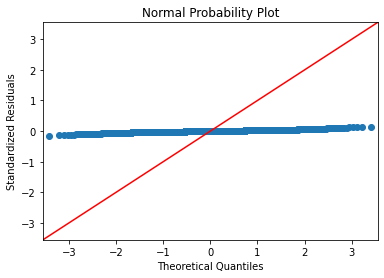

In [442]:
# building the model
model = ols("rpl_themes ~  area_sqmi + epl_pov + epl_unemp + epl_pci + epl_nohsdp + rpl_theme1 + epl_age65 + epl_age17 + epl_disabl + epl_sngpnt + rpl_theme2 + epl_minrty + epl_limeng + rpl_theme3+ epl_munit + epl_mobile + epl_crowd + epl_noveh + epl_groupq+ rpl_theme4 + f_theme1 + f_theme2 + f_theme3 + f_theme4 + f_total + f_pov_0 + f_pov_1 + f_unemp_0 + f_unemp_1 + f_pci_0 + f_pci_1+ f_nohsdp_0 + f_nohsdp_1 + f_age65_0 + f_age65_1 + f_age17_0 + f_age17_1 + f_disabl_0 + f_disabl_1 + f_sngpnt_0 + f_sngpnt_1 + f_minrty_0 + f_minrty_1 + f_limeng_0+ f_limeng_1 + f_munit_0 + f_munit_1 + f_mobile_0 + f_mobile_1 + f_crowd_0 + f_crowd_1 + f_noveh_0 + f_noveh_1 + f_groupq_0+ f_groupq_1 + spl_theme1 + spl_theme2 + spl_theme3 + spl_theme4 + spl_themes", data=df_OLS).fit()

# creating the normal probability plot
sm.qqplot(model.resid, line="45")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("Normal Probability Plot")
plt.show()

### Box Cox Transformation

In [443]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
pt = PowerTransformer(method="yeo-johnson")
rpl_themes_df = pd.DataFrame(df_OLS["rpl_themes"])
pt.fit(rpl_themes_df)
print(pt.lambdas_)  # optimal lambda value

[0.74884275]


In [444]:
# transform the rpl_themes column
transformed_data = pt.transform(rpl_themes_df)
df_OLS.insert(0, "rpl_themes_transformed", transformed_data)  # new column of transformed rpl_themes

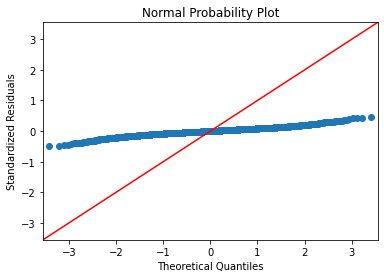

In [445]:
# building the model with the transformed data
model2 = ols("rpl_themes_transformed ~ area_sqmi + epl_pov + epl_unemp + epl_pci + epl_nohsdp + rpl_theme1 + epl_age65 + epl_age17 + epl_disabl + epl_sngpnt + rpl_theme2 + epl_minrty + epl_limeng + rpl_theme3+ epl_munit + epl_mobile + epl_crowd + epl_noveh + epl_groupq + rpl_theme4 + f_theme1 + f_theme2 + f_theme3 + f_theme4 + f_total + f_pov_0 + f_pov_1 + f_unemp_0 + f_unemp_1 + f_pci_0 + f_pci_1+ f_nohsdp_0 + f_nohsdp_1 + f_age65_0 + f_age65_1 + f_age17_0 + f_age17_1 + f_disabl_0 + f_disabl_1 + f_sngpnt_0 + f_sngpnt_1 + f_minrty_0 + f_minrty_1 + f_limeng_0+ f_limeng_1 + f_munit_0 + f_munit_1 + f_mobile_0 + f_mobile_1 + f_crowd_0 + f_crowd_1 + f_noveh_0 + f_noveh_1 + f_groupq_0+ f_groupq_1 + spl_theme1 + spl_theme2 + spl_theme3 + spl_theme4 + spl_themes", data=df_OLS).fit()

# creating the normal probability plot
sm.qqplot(model2.resid, line="45")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("Normal Probability Plot")
plt.show()

### Shapiro-Wilk's Test

In [446]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
w, pvalue = stats.shapiro(model2.resid)
print(w, pvalue)

0.9763079881668091 1.8535733423523486e-22


### Kolmogorov Smirnoff Test

In [447]:
# reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html
stats.kstest(model2.resid, "norm")

KstestResult(statistic=0.40090695326003256, pvalue=0.0)

### Normality Plot

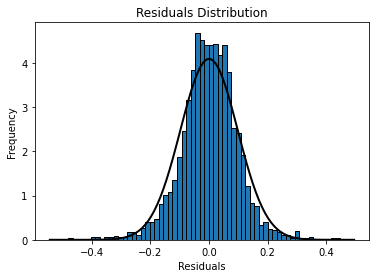

In [448]:
# plot the residuals as a histogram
plt.hist(model2.resid, bins="auto", density=True, histtype="bar", ec="k")
mu, std = norm.fit(model2.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, "k", linewidth=2)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

### Homoscedasticity Assumption

Text(0, 0.5, 'Residuals')

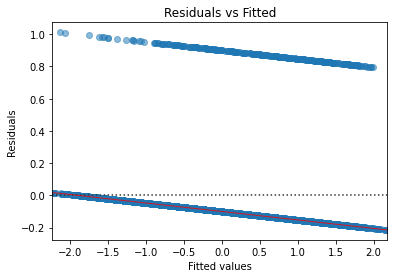

In [449]:
# Reference: https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/

# fitted values
model_fitted_y = model2.fittedvalues
# residuals
model_residuals = model2.resid
# normalized residuals
model_norm_residuals = model2.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model2.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model2.get_influence().cooks_distance[0]

# plot details and formatting
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(
    model_fitted_y,
    df_OLS.columns[-1],
    data=df_OLS,
    lowess=True,
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red", "lw": 1, "alpha": 0.8},
)

plot_lm_1.axes[0].set_title("Residuals vs Fitted")
plot_lm_1.axes[0].set_xlabel("Fitted values")
plot_lm_1.axes[0].set_ylabel("Residuals")

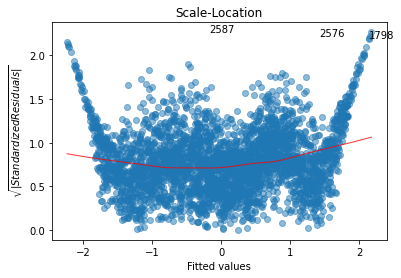

In [450]:
# Reference: https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/

# plot details and formatting
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(
    model_fitted_y,
    model_norm_residuals_abs_sqrt,
    scatter=False,
    ci=False,
    lowess=True,
    line_kws={"color": "red", "lw": 1, "alpha": 0.8},
)
plot_lm_3.axes[0].set_title("Scale-Location")
plot_lm_3.axes[0].set_xlabel("Fitted values")
plot_lm_3.axes[0].set_ylabel("$\sqrt{|Standardized Residuals|}$")

# absolute normalized residuals
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)

# top 3 normalized residuals
abs_norm_resid_top_3 = abs_norm_resid[:3]

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(
        i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i])
    )

### Method 2

In [451]:
# reading in the dataset
df = pd.read_csv("https://raw.githubusercontent.com/gspiga/STA160/main/Final%20Project/Data/data.csv", index_col=[0])

In [452]:
# creating dummy variables for flags (binary data)
df_OLS = pd.get_dummies(df,
    columns=[
        "f_pov",
        "f_unemp",
        "f_pci",
        "f_nohsdp",
        "f_age65",
        "f_age17",
        "f_disabl",
        "f_sngpnt",
        "f_minrty",
        "f_limeng",
        "f_munit",
        "f_mobile",
        "f_crowd",
        "f_noveh",
        "f_groupq"
    ],
)

### Variance Inflation Factor (VIF)

In [453]:
# building an OLS on current dataset
X = df_OLS.drop(['state', 'county', 'rpl_themes'], axis = 1)
X = sm.add_constant(X)
Y = df_OLS['rpl_themes']
reg = sm.OLS(Y, X).fit()

In [454]:
# calculating variance_inflation_factor (from statsmodels) for each independent variable
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})

,variables,VIF
0,area_sqmi,1.120052
1,epl_pov,inf
2,epl_unemp,inf
3,epl_pci,inf
4,epl_nohsdp,inf
5,spl_theme1,inf
6,rpl_theme1,798.402264
7,epl_age65,inf
8,epl_age17,inf
9,epl_disabl,inf


In [455]:
# correlation matrix
X.corr()

,const,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,spl_theme1,rpl_theme1,epl_age65,epl_age17,epl_disabl,epl_sngpnt,spl_theme2,rpl_theme2,epl_minrty,epl_limeng,spl_theme3,rpl_theme3,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,spl_theme4,rpl_theme4,spl_themes,f_theme1,f_theme2,f_theme3,f_theme4,f_total,f_pov_0,f_pov_1,f_unemp_0,f_unemp_1,f_pci_0,f_pci_1,f_nohsdp_0,f_nohsdp_1,f_age65_0,f_age65_1,f_age17_0,f_age17_1,f_disabl_0,f_disabl_1,f_sngpnt_0,f_sngpnt_1,f_minrty_0,f_minrty_1,f_limeng_0,f_limeng_1,f_munit_0,f_munit_1,f_mobile_0,f_mobile_1,f_crowd_0,f_crowd_1,f_noveh_0,f_noveh_1,f_groupq_0,f_groupq_1
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_sqmi,NaN,1.000000,0.016569,0.075059,-0.003528,-0.016718,0.020907,0.019880,-0.068964,0.076435,-0.051498,0.043415,-0.000391,0.002174,0.112030,0.043795,0.087116,0.086326,0.004797,-0.020491,0.141730,0.028208,0.063312,0.091569,0.092826,0.064819,0.048351,0.119473,0.106426,0.103954,0.123792,-0.051004,0.051004,-0.101686,0.101686,-0.003500,0.003500,0.011921,-0.011921,-0.012524,0.012524,-0.146883,0.146883,0.014529,-0.014529,-0.101727,0.101727,-0.140659,0.140659,-0.036252,0.036252,0.021513,-0.021513,0.014449,-0.014449,-0.198211,0.198211,-0.079335,0.079335,-0.013935,0.013935
epl_pov,NaN,0.016569,1.000000,0.635055,0.791417,0.666593,0.905250,0.904765,-0.063324,0.000415,0.539577,0.464650,0.520358,0.575047,0.333872,-0.027878,0.168313,0.168657,-0.225677,0.530049,0.319975,0.558987,0.180899,0.569682,0.566381,0.824587,0.563636,0.305113,0.192332,0.355561,0.527458,-0.518820,0.518820,-0.381437,0.381437,-0.447430,0.447430,-0.332897,0.332897,0.074104,-0.074104,-0.026690,0.026690,-0.308298,0.308298,-0.369137,0.369137,-0.269811,0.269811,-0.049966,0.049966,0.074223,-0.074223,-0.338628,0.338628,-0.141036,0.141036,-0.301160,0.301160,-0.159643,0.159643
epl_unemp,NaN,0.075059,0.635055,1.000000,0.513375,0.497040,0.774413,0.770999,-0.119086,-0.031613,0.458635,0.416167,0.400325,0.425557,0.381433,0.025417,0.225303,0.227115,-0.107134,0.374970,0.283458,0.478182,0.059158,0.454463,0.447540,0.703567,0.476848,0.247805,0.188715,0.291221,0.446045,-0.353336,0.353336,-0.522407,0.522407,-0.318743,0.318743,-0.227377,0.227377,0.062491,-0.062491,-0.013709,0.013709,-0.250010,0.250010,-0.310490,0.310490,-0.280346,0.280346,-0.033484,0.033484,0.040188,-0.040188,-0.266389,0.266389,-0.127597,0.127597,-0.286867,0.286867,-0.069231,0.069231
epl_pci,NaN,-0.003528,0.791417,0.513375,1.000000,0.733303,0.889065,0.888648,0.002170,0.102368,0.600181,0.332186,0.573114,0.598091,0.189311,-0.104102,0.044536,0.042794,-0.454167,0.632661,0.278131,0.374561,0.153068,0.410206,0.397874,0.742601,0.576521,0.320425,0.155185,0.252645,0.490997,-0.447846,0.447846,-0.359876,0.359876,-0.520252,0.520252,-0.390715,0.390715,0.101900,-0.101900,-0.123818,0.123818,-0.334328,0.334328,-0.304638,0.304638,-0.221575,0.221575,-0.036456,0.036456,0.323756,-0.323756,-0.358601,0.358601,-0.143449,0.143449,-0.186933,0.186933,-0.251712,0.251712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f_crowd_1,NaN,0.198211,0.141036,0.127597,0.143449,0.273151,0.200593,0.197642,-0.253504,0.284111,-0.132122,0.199405,0.053916,0.058491,0.362672,0.309785,0.378874,0.364476,0.018257,0.054199,0.516988,0.048844,-0.045858,0.248486,0.246722,0.298555,0.241984,0.243609,0.515894,0.470374,0.486767,-0.137756,0.137756,-0.111938,0.111938,-0.167951,0.167951,-0.304085,0.304085,0.066585,-0.066585,-0.392664,0.392664,0.035804,-0.035804,-0.211374,0.211374,-0.397181,0.397181,-0.459174,0.459174,-0.034923,0.034923,-0.025282,0.025282,-1.000000,1.000000,-0.074033,0.074033,-0.021293,0.021293
f_noveh_0,NaN,-0.079335,

In [456]:
# list the correlations between every predictor and sort in ascending order
top_corr = X.corr().unstack().sort_values().drop_duplicates()

# pick the highest negatively correlated predictors
print(top_corr.head(10))

# pick the highest positively correlated predictors
print(top_corr.tail(10))

f_munit_1   f_munit_0    -1.000000
f_disabl_0  f_disabl_1   -1.000000
f_limeng_0  f_limeng_1   -1.000000
f_minrty_0  f_minrty_1   -1.000000
f_age17_0   f_age17_1    -1.000000
f_theme3    f_limeng_0   -0.830895
            f_minrty_0   -0.829302
f_theme1    f_pci_0      -0.808678
f_pov_0     f_theme1     -0.808018
f_theme1    f_nohsdp_0   -0.696911
dtype: float64
rpl_theme1  spl_themes    0.893818
spl_themes  spl_theme1    0.895397
rpl_theme1  epl_pov       0.904765
epl_pov     spl_theme1    0.905250
rpl_theme2  spl_theme2    0.966121
spl_theme4  rpl_theme4    0.983788
rpl_theme1  spl_theme1    0.998620
rpl_theme3  spl_theme3    0.998822
area_sqmi   area_sqmi     1.000000
const       const              NaN
dtype: float64


In [457]:
# remove highly correlated predictors stated above
df_OLS = df_OLS.loc[:, ~df_OLS.columns.str.startswith("spl_")]
df_OLS = df_OLS.drop(['state', 'county', 'rpl_theme1', 'rpl_theme2', 'rpl_theme3', 'rpl_theme4'], axis = 1)
df_OLS

,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,rpl_themes,f_theme1,f_theme2,f_theme3,f_theme4,f_total,f_pov_0,f_pov_1,f_unemp_0,f_unemp_1,f_pci_0,f_pci_1,f_nohsdp_0,f_nohsdp_1,f_age65_0,f_age65_1,f_age17_0,f_age17_1,f_disabl_0,f_disabl_1,f_sngpnt_0,f_sngpnt_1,f_minrty_0,f_minrty_1,f_limeng_0,f_limeng_1,f_munit_0,f_munit_1,f_mobile_0,f_mobile_1,f_crowd_0,f_crowd_1,f_noveh_0,f_noveh_1,f_groupq_0,f_groupq_1
0,594.443459,0.5401,0.2745,0.2860,0.4397,0.1850,0.7529,0.7905,0.3792,0.6336,0.5113,0.6017,0.7408,0.2964,0.4846,0.1525,0.4354,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,1589.793007,0.2239,0.3121,0.2057,0.3209,0.6428,0.4323,0.3524,0.1391,0.5158,0.3582,0.9713,0.5339,0.2604,0.1328,0.3018,0.2162,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
2,885.001636,0.9631,0.9217,0.9481,0.9701,0.4893,0.3327,0.9064,0.9468,0.8965,0.7052,0.2416,0.9280,0.8198,0.8685,0.9449,0.9959,4,2,0,2,8,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1
3,622.461089,0.4430,0.7895,0.8987,0.7351,0.3200,0.2846,0.6074,0.1706,0.6390,0.2270,0.4317,0.9207,0.0981,0.5441,0.9214,0.6003,0,0,0,2,2,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1
4,644.830460,0.4723,0.2611,0.7561,0.8405,0.4715,0.6406,0.3763,0.2961,0.4206,0.7170,0.1512,0.8816,0.3703,0.2420,0.1165,0.4242,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,10426.975725,0.3127,0.4490,0.1497,0.2668,0.0293,0.9150,0.2041,0.7679,0.5680,0.7052,0.7307,0.8306,0.4817,0.0503,0.2582,0.3701,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3138,3996.844622,0.0522,0.0264,0.0051,0.0548,0.1334,0.1506,0.0060,0.2216,0.5400,0.9000,0.8109,0.1442,0.9688,0.0503,0.7561,0.1127,0,0,1,1,2,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0
3139,2081.719807,0.3430,0.6032,0.4443,0.1347,0.0675,0.9685,0.6488,0.2665,0.4136,0.4642,0.7453,0.8816,0.7249,0.1971,0.2582,0.4522,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3140,2238.672972,0.3360,0.6207,0.4035,0.3792,0.7380,0.7122,0.4448,0.2961,0.5330,0.2270,0.1958,0.5384,0.4457,0.3715,0.4995,0.3732,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [458]:
# building the OLS model on our dataset
X = df_OLS.drop(['rpl_themes'], axis = 1)
X = sm.add_constant(X)
Y = df_OLS['rpl_themes']
reg = sm.OLS(Y, X).fit()

In [459]:
# calculating variance_inflation_factor (from statsmodels) for each independent variable
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})

,variables,VIF
0,area_sqmi,1.116736
1,epl_pov,4.919446
2,epl_unemp,2.568578
3,epl_pci,5.782249
4,epl_nohsdp,4.187515
5,epl_age65,3.333429
6,epl_age17,3.088097
7,epl_disabl,3.749434
8,epl_sngpnt,2.397269
9,epl_minrty,2.941395


In [460]:
# removing the flags columns and rebuilding the OLS model with current dataset
df_OLS = df_OLS.loc[:, ~df_OLS.columns.str.startswith("f_")]
X = df_OLS.drop(['rpl_themes'], axis = 1)
X = sm.add_constant(X)
Y = df_OLS['rpl_themes']
reg = sm.OLS(Y, X).fit()

# re-calculating variance_inflation_factor (from statsmodels) for each independent variable
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})

,variables,VIF
0,area_sqmi,1.059807
1,epl_pov,4.314763
2,epl_unemp,2.186299
3,epl_pci,4.774771
4,epl_nohsdp,3.444706
5,epl_age65,2.602554
6,epl_age17,2.371569
7,epl_disabl,3.027480
8,epl_sngpnt,2.093853
9,epl_minrty,2.423777


### Normality Assumption

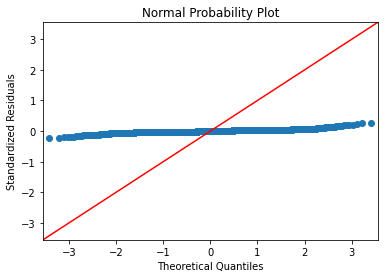

In [461]:
# building the model
model3 = ols("rpl_themes ~  area_sqmi + epl_pov + epl_unemp + epl_pci + epl_nohsdp + epl_age65 + epl_age17 + epl_disabl + epl_sngpnt + epl_minrty + epl_limeng + epl_munit + epl_mobile + epl_crowd + epl_noveh + epl_groupq", data=df_OLS).fit()

# creating the normal probability plot
sm.qqplot(model3.resid, line="45")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("Normal Probability Plot")
plt.show()

### Box Cox Transformation

In [462]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
pt = PowerTransformer(method="yeo-johnson")
rpl_themes_df = pd.DataFrame(df_OLS["rpl_themes"])
pt.fit(rpl_themes_df)
print(pt.lambdas_)  # optimal lambda value

[0.74884275]


In [463]:
# transform the rpl_themes column
transformed_data = pt.transform(rpl_themes_df) # rpl_themes_df
df_OLS.insert(0, "rpl_themes_transformed", transformed_data)  # new column of transformed score

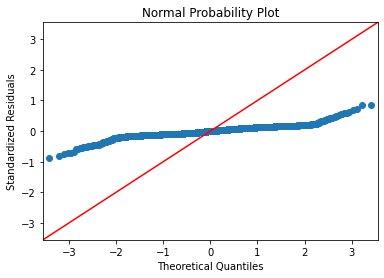

In [464]:
# building the model with the transformed data
model4 = ols("rpl_themes_transformed ~  area_sqmi + epl_pov + epl_unemp + epl_pci + epl_nohsdp + epl_age65 + epl_age17 + epl_disabl + epl_sngpnt + epl_minrty + epl_limeng + epl_munit + epl_mobile + epl_crowd + epl_noveh + epl_groupq", data=df_OLS).fit()

# creating the normal probability plot
sm.qqplot(model4.resid, line="45")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("Normal Probability Plot")
plt.show()

### Shapiro-Wilk's Test

In [465]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
w, pvalue = stats.shapiro(model4.resid)
print(w, pvalue)

0.9297755360603333 4.385920879740134e-36


### Kolmogorov Smirnoff Test

In [466]:
# reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html
stats.kstest(model4.resid, "norm")

KstestResult(statistic=0.40074497769267947, pvalue=0.0)

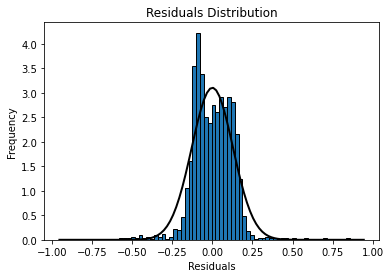

In [467]:
# plot the residuals as a histogram
plt.hist(model4.resid, bins="auto", density=True, histtype="bar", ec="k")
mu, std = norm.fit(model4.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, "k", linewidth=2)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

### Homoscedasticity Assumption

Text(0, 0.5, 'Residuals')

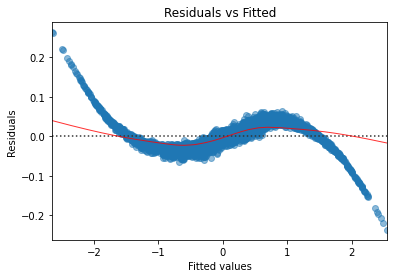

In [468]:
# Reference: https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/

# fitted values
model_fitted_y = model4.fittedvalues
# residuals
model_residuals = model4.resid
# normalized residuals
model_norm_residuals = model4.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model4.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model4.get_influence().cooks_distance[0]

# plot details and formatting
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(
    model_fitted_y,
    df_OLS.columns[-1],
    data=df_OLS,
    lowess=True,
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red", "lw": 1, "alpha": 0.8},
)

plot_lm_1.axes[0].set_title("Residuals vs Fitted")
plot_lm_1.axes[0].set_xlabel("Fitted values")
plot_lm_1.axes[0].set_ylabel("Residuals")

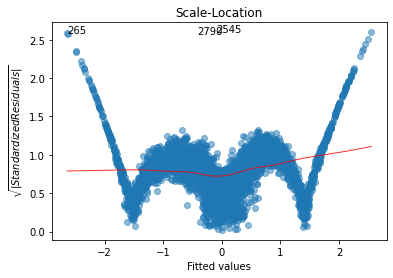

In [469]:
# Reference: https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/

# plot details and formatting
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(
    model_fitted_y,
    model_norm_residuals_abs_sqrt,
    scatter=False,
    ci=False,
    lowess=True,
    line_kws={"color": "red", "lw": 1, "alpha": 0.8},
)
plot_lm_3.axes[0].set_title("Scale-Location")
plot_lm_3.axes[0].set_xlabel("Fitted values")
plot_lm_3.axes[0].set_ylabel("$\sqrt{|Standardized Residuals|}$")

# absolute normalized residuals
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)

# top 3 normalized residuals
abs_norm_resid_top_3 = abs_norm_resid[:3]

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(
        i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i])
    )

## Ridge Regression

In [470]:
data = original_data

data['rpl_themes'] = pd.to_numeric(data['rpl_themes'])

#Remove last column
data = data.iloc[: , :-1]

#Sorting in alphabetical order by state then by column
data= data.sort_values(["state", "county"])
data = data.reset_index(drop=True)

data = data[data.rpl_themes >= 0]

#We remove Margin Of Error Columns
data = data.loc[:, ~data.columns.str.startswith("m_")]
data = data.loc[:, ~data.columns.str.startswith("mp_")]

#We would like a dataset with only the EPL columns 
data = data.loc[:, ~data.columns.str.startswith("e_")]
data = data.loc[:, ~data.columns.str.startswith("ep_")]

data = data.drop(["st_abbr", "fips", "location", "st"], axis=1)
full_data = data

In [471]:
# Read in data
data = full_data
data = data.drop(
    [
        "rpl_theme1",
        "rpl_theme2",
        "rpl_theme3",
        "rpl_theme4",
        "spl_theme1",
        "spl_theme2",
        "spl_theme3",
        "spl_theme4",
        "spl_themes",
        "f_total",
    ],
    axis=1,
)
data

,state,county,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,rpl_themes,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4
0,ALABAMA,Autauga,594.4434589,0.5401,0.2745,0.286,0.4397,0.185,0.7529,0.7905,0.3792,0.6336,0.5113,0.6017,0.7408,0.2964,0.4846,0.1525,0.4354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ALABAMA,Baldwin,1589.7930067,0.2239,0.3121,0.2057,0.3209,0.6428,0.4323,0.3524,0.1391,0.5158,0.3582,0.9713,0.5339,0.2604,0.1328,0.3018,0.2162,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,ALABAMA,Barbour,885.0016356,0.9631,0.9217,0.9481,0.9701,0.4893,0.3327,0.9064,0.9468,0.8965,0.7052,0.2416,0.928,0.8198,0.8685,0.9449,0.9959,1,1,1,1,4,0,0,1,1,2,0,0,0,0,1,0,0,1,2
3,ALABAMA,Bibb,622.4610887,0.443,0.7895,0.8987,0.7351,0.32,0.2846,0.6074,0.1706,0.639,0.227,0.4317,0.9207,0.0981,0.5441,0.9214,0.6003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
4,ALABAMA,Blount,644.8304602,0.4723,0.2611,0.7561,0.8405,0.4715,0.6406,0.3763,0.2961,0.4206,0.717,0.1512,0.8816,0.3703,0.242,0.1165,0.4242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,WYOMING,Sweetwater,10426.9757251,0.3127,0.449,0.1497,0.2668,0.0293,0.915,0.2041,0.7679,0.568,0.7052,0.7307,0.8306,0.4817,0.0503,0.2582,0.3701,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3138,WYOMING,Teton,3996.8446222,0.0522,0.0264,0.0051,0.0548,0.1334,0.1506,0.006,0.2216,0.54,0.9,0.8109,0.1442,0.9688,0.0503,0.7561,0.1127,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1
3139,WYOMING,Uinta,2081.7198073,0.343,0.6032,0.4443,0.1347,0.0675,0.9685,0.6488,0.2665,0.4136,0.4642,0.7453,0.8816,0.7249,0.1971,0.2582,0.4522,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3140,WYOMING,Washakie,2238.6729723,0.336,0.6207,0.4035,0.3792,0.738,0.7122,0.4448,0.2961,0.533,0.227,0.1958,0.5384,0.4457,0.3715,0.4995,0.3732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [472]:
X = data.iloc[:, 2:18]
y = data["rpl_themes"]
list_numerical = X.columns

(-48.900000000000006, 1048.9, -0.02757475413987238, 0.178778059845069)

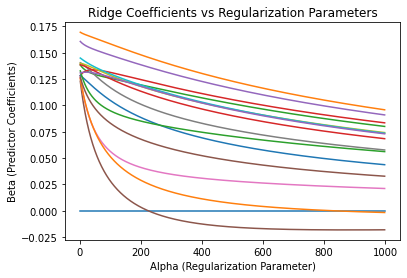

In [473]:
coef = []
alphas = range(1,1000)

for a in alphas:
  ridgereg = Ridge(alpha=a)
  ridgereg.fit(X,y)
  coef.append(ridgereg.coef_)

## Make plot of Beta as a function of Lambda
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')

In [474]:
# Ridge Regression
warnings.filterwarnings("ignore")  # Warnings about using iloc

# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize Values
scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

# Cross validation to find optimal value
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

2

In [475]:
# Applying ridge using alpha = 2
ridge = Ridge(alpha = 2)
ridge.fit(X_train, y_train)             
pred = ridge.predict(X_test)           
print(pd.Series(ridge.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred))      
print("R squared training set", round(ridge.score(X_train, y_train), 2))
print("R squared test set", round(ridge.score(X_test, y_test), 2))

area_sqmi     0.000644
epl_pov       0.048810
epl_unemp     0.040681
epl_pci       0.037622
epl_nohsdp    0.047481
epl_age65     0.036383
epl_age17     0.036754
epl_disabl    0.038795
epl_sngpnt    0.040231
epl_minrty    0.041173
epl_limeng    0.039192
epl_munit     0.036140
epl_mobile    0.039140
epl_crowd     0.040490
epl_noveh     0.037512
epl_groupq    0.037401
dtype: float64
0.0012738529638996253
R squared training set 0.98
R squared test set 0.98


In [476]:
# Visualizing residuals
residuals = y_test - pred
display(px.scatter(x = pred, y = residuals))

## LASSO Regression

In [477]:
# Loading in the dataset
data = full_data
data = data.drop(
    [
        "rpl_theme1",
        "rpl_theme2",
        "rpl_theme3",
        "rpl_theme4",
        "spl_theme1",
        "spl_theme2",
        "spl_theme3",
        "spl_theme4",
        "spl_themes",
        "f_total",
    ],
    axis=1,
)
data

,state,county,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,rpl_themes,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4
0,ALABAMA,Autauga,594.4434589,0.5401,0.2745,0.286,0.4397,0.185,0.7529,0.7905,0.3792,0.6336,0.5113,0.6017,0.7408,0.2964,0.4846,0.1525,0.4354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ALABAMA,Baldwin,1589.7930067,0.2239,0.3121,0.2057,0.3209,0.6428,0.4323,0.3524,0.1391,0.5158,0.3582,0.9713,0.5339,0.2604,0.1328,0.3018,0.2162,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,ALABAMA,Barbour,885.0016356,0.9631,0.9217,0.9481,0.9701,0.4893,0.3327,0.9064,0.9468,0.8965,0.7052,0.2416,0.928,0.8198,0.8685,0.9449,0.9959,1,1,1,1,4,0,0,1,1,2,0,0,0,0,1,0,0,1,2
3,ALABAMA,Bibb,622.4610887,0.443,0.7895,0.8987,0.7351,0.32,0.2846,0.6074,0.1706,0.639,0.227,0.4317,0.9207,0.0981,0.5441,0.9214,0.6003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
4,ALABAMA,Blount,644.8304602,0.4723,0.2611,0.7561,0.8405,0.4715,0.6406,0.3763,0.2961,0.4206,0.717,0.1512,0.8816,0.3703,0.242,0.1165,0.4242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,WYOMING,Sweetwater,10426.9757251,0.3127,0.449,0.1497,0.2668,0.0293,0.915,0.2041,0.7679,0.568,0.7052,0.7307,0.8306,0.4817,0.0503,0.2582,0.3701,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3138,WYOMING,Teton,3996.8446222,0.0522,0.0264,0.0051,0.0548,0.1334,0.1506,0.006,0.2216,0.54,0.9,0.8109,0.1442,0.9688,0.0503,0.7561,0.1127,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1
3139,WYOMING,Uinta,2081.7198073,0.343,0.6032,0.4443,0.1347,0.0675,0.9685,0.6488,0.2665,0.4136,0.4642,0.7453,0.8816,0.7249,0.1971,0.2582,0.4522,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3140,WYOMING,Washakie,2238.6729723,0.336,0.6207,0.4035,0.3792,0.738,0.7122,0.4448,0.2961,0.533,0.227,0.1958,0.5384,0.4457,0.3715,0.4995,0.3732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [478]:
# Preparing X and Y

# Need to drop this y = 0, for boxcox trasnformation
display(data["rpl_themes"][data["rpl_themes"] <= 0])
data = data.drop([265]).reset_index(drop=True)
display(data)

y = data["rpl_themes"]
X = data.iloc[:, 2:19]
display(X)
X = X.drop(["rpl_themes"], 1)
list_numerical = X.columns
display(X)

transformed_data, best_lambda = boxcox(y)
transformed_data

265    0.0
Name: rpl_themes, dtype: float64

,state,county,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,rpl_themes,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4
0,ALABAMA,Autauga,594.4434589,0.5401,0.2745,0.286,0.4397,0.185,0.7529,0.7905,0.3792,0.6336,0.5113,0.6017,0.7408,0.2964,0.4846,0.1525,0.4354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ALABAMA,Baldwin,1589.7930067,0.2239,0.3121,0.2057,0.3209,0.6428,0.4323,0.3524,0.1391,0.5158,0.3582,0.9713,0.5339,0.2604,0.1328,0.3018,0.2162,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,ALABAMA,Barbour,885.0016356,0.9631,0.9217,0.9481,0.9701,0.4893,0.3327,0.9064,0.9468,0.8965,0.7052,0.2416,0.928,0.8198,0.8685,0.9449,0.9959,1,1,1,1,4,0,0,1,1,2,0,0,0,0,1,0,0,1,2
3,ALABAMA,Bibb,622.4610887,0.443,0.7895,0.8987,0.7351,0.32,0.2846,0.6074,0.1706,0.639,0.227,0.4317,0.9207,0.0981,0.5441,0.9214,0.6003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
4,ALABAMA,Blount,644.8304602,0.4723,0.2611,0.7561,0.8405,0.4715,0.6406,0.3763,0.2961,0.4206,0.717,0.1512,0.8816,0.3703,0.242,0.1165,0.4242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,WYOMING,Sweetwater,10426.9757251,0.3127,0.449,0.1497,0.2668,0.0293,0.915,0.2041,0.7679,0.568,0.7052,0.7307,0.8306,0.4817,0.0503,0.2582,0.3701,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3136,WYOMING,Teton,3996.8446222,0.0522,0.0264,0.0051,0.0548,0.1334,0.1506,0.006,0.2216,0.54,0.9,0.8109,0.1442,0.9688,0.0503,0.7561,0.1127,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1
3137,WYOMING,Uinta,2081.7198073,0.343,0.6032,0.4443,0.1347,0.0675,0.9685,0.6488,0.2665,0.4136,0.4642,0.7453,0.8816,0.7249,0.1971,0.2582,0.4522,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3138,WYOMING,Washakie,2238.6729723,0.336,0.6207,0.4035,0.3792,0.738,0.7122,0.4448,0.2961,0.533,0.227,0.1958,0.5384,0.4457,0.3715,0.4995,0.3732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,rpl_themes
0,594.4434589,0.5401,0.2745,0.286,0.4397,0.185,0.7529,0.7905,0.3792,0.6336,0.5113,0.6017,0.7408,0.2964,0.4846,0.1525,0.4354
1,1589.7930067,0.2239,0.3121,0.2057,0.3209,0.6428,0.4323,0.3524,0.1391,0.5158,0.3582,0.9713,0.5339,0.2604,0.1328,0.3018,0.2162
2,885.0016356,0.9631,0.9217,0.9481,0.9701,0.4893,0.3327,0.9064,0.9468,0.8965,0.7052,0.2416,0.928,0.8198,0.8685,0.9449,0.9959
3,622.4610887,0.443,0.7895,0.8987,0.7351,0.32,0.2846,0.6074,0.1706,0.639,0.227,0.4317,0.9207,0.0981,0.5441,0.9214,0.6003
4,644.8304602,0.4723,0.2611,0.7561,0.8405,0.4715,0.6406,0.3763,0.2961,0.4206,0.717,0.1512,0.8816,0.3703,0.242,0.1165,0.4242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,10426.9757251,0.3127,0.449,0.1497,0.2668,0.0293,0.915,0.2041,0.7679,0.568,0.7052,0.7307,0.8306,0.4817,0.0503,0.2582,0.3701
3136,3996.8446222,0.0522,0.0264,0.0051,0.0548,0.1334,0.1506,0.006,0.2216,0.54,0.9,0.8109,0.1442,0.9688,0.0503,0.7561,0.1127
3137,2081.7198073,0.343,0.6032,0.4443,0.1347,0.0675,0.9685,0.6488,0.2665,0.4136,0.4642,0.7453,0.8816,0.7249,0.1971,0.2582,0.4522
3138,2238.6729723,0.336,0.6207,0.4035,0.3792,0.738,0.7122,0.4448,0.2961,0.533,0.227,0.1958,0.5384,0.4457,0.3715,0.4995,0.3732


,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq
0,594.4434589,0.5401,0.2745,0.286,0.4397,0.185,0.7529,0.7905,0.3792,0.6336,0.5113,0.6017,0.7408,0.2964,0.4846,0.1525
1,1589.7930067,0.2239,0.3121,0.2057,0.3209,0.6428,0.4323,0.3524,0.1391,0.5158,0.3582,0.9713,0.5339,0.2604,0.1328,0.3018
2,885.0016356,0.9631,0.9217,0.9481,0.9701,0.4893,0.3327,0.9064,0.9468,0.8965,0.7052,0.2416,0.928,0.8198,0.8685,0.9449
3,622.4610887,0.443,0.7895,0.8987,0.7351,0.32,0.2846,0.6074,0.1706,0.639,0.227,0.4317,0.9207,0.0981,0.5441,0.9214
4,644.8304602,0.4723,0.2611,0.7561,0.8405,0.4715,0.6406,0.3763,0.2961,0.4206,0.717,0.1512,0.8816,0.3703,0.242,0.1165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,10426.9757251,0.3127,0.449,0.1497,0.2668,0.0293,0.915,0.2041,0.7679,0.568,0.7052,0.7307,0.8306,0.4817,0.0503,0.2582
3136,3996.8446222,0.0522,0.0264,0.0051,0.0548,0.1334,0.1506,0.006,0.2216,0.54,0.9,0.8109,0.1442,0.9688,0.0503,0.7561
3137,2081.7198073,0.343,0.6032,0.4443,0.1347,0.0675,0.9685,0.6488,0.2665,0.4136,0.4642,0.7453,0.8816,0.7249,0.1971,0.2582
3138,2238.6729723,0.336,0.6207,0.4035,0.3792,0.738,0.7122,0.4448,0.2961,0.533,0.227,0.1958,0.5384,0.4457,0.3715,0.4995


array([-0.62845379, -0.93483851, -0.00410246, ..., -0.60715609,
       -0.70951002, -0.74413542])

In [479]:
y = transformed_data

In [480]:
# Lasso Regression
warnings.filterwarnings("ignore")  # Warnings about using iloc

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

# Standardize Values
scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

Text(0.5, 1.0, 'LASSO Coefficients vs Regularization Parameters')

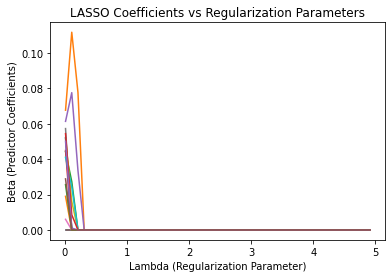

In [481]:
# Graph
coef = []
alphas = np.arange(0.01, 5, 0.10)
lasso = Lasso(max_iter=10000)

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coef.append(lasso.coef_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas, coef)
ax.set_xlabel("Lambda (Regularization Parameter)")
ax.set_ylabel("Beta (Predictor Coefficients)")
ax.set_title("LASSO Coefficients vs Regularization Parameters")

In [482]:
# K Fold Cross Validation
model = LassoCV(cv=10, random_state=1, max_iter=10000)
model.fit(X_train, y_train)
pred = model.predict(X_test)
residuals = y_test - pred
optimal = model.alpha_
display(optimal)

0.0003098532188521787

In [483]:
print(mean_squared_error(y_test, pred))
print("R squared training set", round(model.score(X_train, y_train), 2))
print("R squared test set", round(model.score(X_test, y_test), 2))

0.0027175759500309505
R squared training set 0.98
R squared test set 0.98


In [484]:
coefs = np.array(model.coef_)
comp = pd.DataFrame((X_test.columns, coefs)).T
comp = comp.rename({0: "Variable", 1: "Coef"}, axis=1)
display(comp)

display(X_test.columns)


new_pred = model.predict(X_test)
new_resid = y_test - new_pred

display(px.scatter(x=new_pred, y=y_test, labels={"x": "Predicted", "y": "Actual"}))
display(
    px.scatter(x=new_pred, y=new_resid, labels={"x": "Predicted", "y": "Residuals"})
)

,Variable,Coef
0,area_sqmi,-0.000865
1,epl_pov,0.061047
2,epl_unemp,0.052824
3,epl_pci,0.046073
4,epl_nohsdp,0.061752
5,epl_age65,0.045723
6,epl_age17,0.044292
7,epl_disabl,0.058902
8,epl_sngpnt,0.053333
9,epl_minrty,0.044411


Index(['area_sqmi', 'epl_pov', 'epl_unemp', 'epl_pci', 'epl_nohsdp',
       'epl_age65', 'epl_age17', 'epl_disabl', 'epl_sngpnt', 'epl_minrty',
       'epl_limeng', 'epl_munit', 'epl_mobile', 'epl_crowd', 'epl_noveh',
       'epl_groupq'],
      dtype='object')

In [485]:
# Loading in the dataset
data = full_data
data = data.drop(
    [
        "rpl_theme1",
        "rpl_theme2",
        "rpl_theme3",
        "rpl_theme4",
        "spl_theme1",
        "spl_theme2",
        "spl_theme3",
        "spl_theme4",
        "spl_themes",
        "f_total",
    ],
    axis=1,
)
data

,state,county,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,rpl_themes,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4
0,ALABAMA,Autauga,594.4434589,0.5401,0.2745,0.286,0.4397,0.185,0.7529,0.7905,0.3792,0.6336,0.5113,0.6017,0.7408,0.2964,0.4846,0.1525,0.4354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ALABAMA,Baldwin,1589.7930067,0.2239,0.3121,0.2057,0.3209,0.6428,0.4323,0.3524,0.1391,0.5158,0.3582,0.9713,0.5339,0.2604,0.1328,0.3018,0.2162,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,ALABAMA,Barbour,885.0016356,0.9631,0.9217,0.9481,0.9701,0.4893,0.3327,0.9064,0.9468,0.8965,0.7052,0.2416,0.928,0.8198,0.8685,0.9449,0.9959,1,1,1,1,4,0,0,1,1,2,0,0,0,0,1,0,0,1,2
3,ALABAMA,Bibb,622.4610887,0.443,0.7895,0.8987,0.7351,0.32,0.2846,0.6074,0.1706,0.639,0.227,0.4317,0.9207,0.0981,0.5441,0.9214,0.6003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
4,ALABAMA,Blount,644.8304602,0.4723,0.2611,0.7561,0.8405,0.4715,0.6406,0.3763,0.2961,0.4206,0.717,0.1512,0.8816,0.3703,0.242,0.1165,0.4242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,WYOMING,Sweetwater,10426.9757251,0.3127,0.449,0.1497,0.2668,0.0293,0.915,0.2041,0.7679,0.568,0.7052,0.7307,0.8306,0.4817,0.0503,0.2582,0.3701,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3138,WYOMING,Teton,3996.8446222,0.0522,0.0264,0.0051,0.0548,0.1334,0.1506,0.006,0.2216,0.54,0.9,0.8109,0.1442,0.9688,0.0503,0.7561,0.1127,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1
3139,WYOMING,Uinta,2081.7198073,0.343,0.6032,0.4443,0.1347,0.0675,0.9685,0.6488,0.2665,0.4136,0.4642,0.7453,0.8816,0.7249,0.1971,0.2582,0.4522,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3140,WYOMING,Washakie,2238.6729723,0.336,0.6207,0.4035,0.3792,0.738,0.7122,0.4448,0.2961,0.533,0.227,0.1958,0.5384,0.4457,0.3715,0.4995,0.3732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [486]:
y = data["rpl_themes"]
X = data.iloc[:, 2:19]
display(X)
X = X.drop(["rpl_themes"], 1)
list_numerical = X.columns
display(X)

,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,rpl_themes
0,594.4434589,0.5401,0.2745,0.286,0.4397,0.185,0.7529,0.7905,0.3792,0.6336,0.5113,0.6017,0.7408,0.2964,0.4846,0.1525,0.4354
1,1589.7930067,0.2239,0.3121,0.2057,0.3209,0.6428,0.4323,0.3524,0.1391,0.5158,0.3582,0.9713,0.5339,0.2604,0.1328,0.3018,0.2162
2,885.0016356,0.9631,0.9217,0.9481,0.9701,0.4893,0.3327,0.9064,0.9468,0.8965,0.7052,0.2416,0.928,0.8198,0.8685,0.9449,0.9959
3,622.4610887,0.443,0.7895,0.8987,0.7351,0.32,0.2846,0.6074,0.1706,0.639,0.227,0.4317,0.9207,0.0981,0.5441,0.9214,0.6003
4,644.8304602,0.4723,0.2611,0.7561,0.8405,0.4715,0.6406,0.3763,0.2961,0.4206,0.717,0.1512,0.8816,0.3703,0.242,0.1165,0.4242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,10426.9757251,0.3127,0.449,0.1497,0.2668,0.0293,0.915,0.2041,0.7679,0.568,0.7052,0.7307,0.8306,0.4817,0.0503,0.2582,0.3701
3138,3996.8446222,0.0522,0.0264,0.0051,0.0548,0.1334,0.1506,0.006,0.2216,0.54,0.9,0.8109,0.1442,0.9688,0.0503,0.7561,0.1127
3139,2081.7198073,0.343,0.6032,0.4443,0.1347,0.0675,0.9685,0.6488,0.2665,0.4136,0.4642,0.7453,0.8816,0.7249,0.1971,0.2582,0.4522
3140,2238.6729723,0.336,0.6207,0.4035,0.3792,0.738,0.7122,0.4448,0.2961,0.533,0.227,0.1958,0.5384,0.4457,0.3715,0.4995,0.3732


,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq
0,594.4434589,0.5401,0.2745,0.286,0.4397,0.185,0.7529,0.7905,0.3792,0.6336,0.5113,0.6017,0.7408,0.2964,0.4846,0.1525
1,1589.7930067,0.2239,0.3121,0.2057,0.3209,0.6428,0.4323,0.3524,0.1391,0.5158,0.3582,0.9713,0.5339,0.2604,0.1328,0.3018
2,885.0016356,0.9631,0.9217,0.9481,0.9701,0.4893,0.3327,0.9064,0.9468,0.8965,0.7052,0.2416,0.928,0.8198,0.8685,0.9449
3,622.4610887,0.443,0.7895,0.8987,0.7351,0.32,0.2846,0.6074,0.1706,0.639,0.227,0.4317,0.9207,0.0981,0.5441,0.9214
4,644.8304602,0.4723,0.2611,0.7561,0.8405,0.4715,0.6406,0.3763,0.2961,0.4206,0.717,0.1512,0.8816,0.3703,0.242,0.1165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,10426.9757251,0.3127,0.449,0.1497,0.2668,0.0293,0.915,0.2041,0.7679,0.568,0.7052,0.7307,0.8306,0.4817,0.0503,0.2582
3138,3996.8446222,0.0522,0.0264,0.0051,0.0548,0.1334,0.1506,0.006,0.2216,0.54,0.9,0.8109,0.1442,0.9688,0.0503,0.7561
3139,2081.7198073,0.343,0.6032,0.4443,0.1347,0.0675,0.9685,0.6488,0.2665,0.4136,0.4642,0.7453,0.8816,0.7249,0.1971,0.2582
3140,2238.6729723,0.336,0.6207,0.4035,0.3792,0.738,0.7122,0.4448,0.2961,0.533,0.227,0.1958,0.5384,0.4457,0.3715,0.4995


## Quadratic Model

In [487]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    poly_features, y, test_size=0.3, random_state=1
)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
y_pred = poly_reg_model.predict(X_test)
y_pred

resid = y_test - y_pred

display(
    px.scatter(
        x=y_pred,
        y=y_test,
        labels={"x": "Predicted", "y": "Actual"},
        title="Pred v. Actual with Quadratic Model",
    )
)
display(
    px.scatter(
        x=y_pred,
        y=resid,
        labels={"x": "Predicted", "y": "Residuals"},
        title="Pred v. Residuals Quadratic Model",
    )
)

In [488]:
# Measures of Accuracy
adjR2train = 1 - (
    (1 - poly_reg_model.score(X_train, y_train))
    * (len(y_train) - 1)
    / (len(y_train) - X_train.shape[1] - 1)
)
print("Adjusted R squared training set", round(adjR2train, 3))

adjR2test = 1 - (
    (1 - poly_reg_model.score(X_test, y_test))
    * (len(y_test) - 1)
    / (len(y_test) - X_test.shape[1] - 1)
)
print("Adjusted R squared test set", round(adjR2test, 3))

# Training data
pred_train = poly_reg_model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print("MSE training set", round(mse_train, 5))

# Test data
pred = poly_reg_model.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print("MSE test set", round(mse_test, 5))

Adjusted R squared training set 0.987
Adjusted R squared test set 0.98
MSE training set 0.00106
MSE test set 0.00137


### Cubic Model

In [489]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    poly_features, y, test_size=0.2, random_state=1
)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
y_pred = poly_reg_model.predict(X_test)
y_pred

resid = y_test - y_pred

display(
    px.scatter(
        x=y_pred,
        y=y_test,
        labels={"x": "Predicted", "y": "Actual"},
        title="Pred v. Actual with Cubic Model",
    )
)
display(
    px.scatter(
        x=y_pred,
        y=resid,
        labels={"x": "Predicted", "y": "Residuals"},
        title="Pred v. Residuals Cubic Model",
    )
)

In [490]:
# Measures of Accuracy
adjR2train = 1 - (
    (1 - poly_reg_model.score(X_train, y_train))
    * (len(y_train) - 1)
    / (len(y_train) - X_train.shape[1] - 1)
)
print("Adjusted R squared training set", round(adjR2train, 3))

adjR2test = 1 - (
    (1 - poly_reg_model.score(X_test, y_test))
    * (len(y_test) - 1)
    / (len(y_test) - X_test.shape[1] - 1)
)
print("Adjusted R squared test set", round(adjR2test, 3))

# Training data
pred_train = poly_reg_model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print("MSE training set", round(mse_train, 5))

# Test data
pred = poly_reg_model.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print("MSE test set", round(mse_test, 5))

Adjusted R squared training set 0.891
Adjusted R squared test set 1.918
MSE training set 0.00562
MSE test set 0.04002


In [491]:
(
    (1 - poly_reg_model.score(X_test, y_test))
    * (len(y_test) - 1)
    / (len(y_test) - X_test.shape[1] - 1)
)

(len(y_test) - X_test.shape[1] - 1)

X_test.shape[1]


968